# Основы машинного обучения: лабораторная работа №1
## Задание 3. Знакомство с Pandas

В этом задании необходимо научиться базовым приемам работы с данными. Необходимо загрузить заданный по варианту датасет, провести разведочный анализ данных, сформулировать гипотезы о возможном значении всех полей в датасете, проверить эти гипотезы, и ответить на вопросы по данным. <!-- Если в конкретном задании не указано иное, проводить очистку данных (удаление пустых и невалидных значений) не нужно. -->

### Цель

Знакомство с разведочным анализом данных и применение Pandas для извлечения информации

### Оценивание и баллы

За это задание в общей сложности можно получить до 4 баллов. Задание частично проверяется автоматически, а частично будет оцениваться вручную. Чтобы получить максимальный балл,  необходимо успешно выполнить приведенные ниже задачи.

## Важные замечания

1. *Откройте этот файл в своем репозитории на GitHub и скопируйте адрес из адресной строки браузера. Перейдите в [Google Colab](https://colab.research.google.com/), выберите `Файл -> Открыть ноутбук -> GitHub`, вставьте скопированный URL и нажмите кнопку поиска (кнопка с лупой справа от поля ввода строки для поиска). В Google Colab откроется копия этого ноутбука из персонального репозитория на GitHub.*
2. *Не удаляйте и не изменяйте имена переменных в ячейках с кодом ниже. Можно добавлять в каждую ячейку произвольное количество строк кода, главное - сохранить результат решения задачи в предопределенную (-ые) переменную (-ые) в соответствующей ячейке. Если этого не сделать, автоматические тесты не будут пройдены.*
3. *Чтобы сохранить работу, выберите `Файл -> Сохранить копию на GitHub` и __вручную выберите правильный репозиторий из раскрывающегося списка__.*
4. *Если в процессе выполнения задания этот файл окажется испорчен, ознакомьтесь с инструкцией в ноутбуке [jupyter_assignment](jupyter_assignment.ipynb), раздел "Повторная сдача".*  


#### Задачи

#### 1. Определить номер варианта
Перейдите по ссылке из личного кабинета на Google Таблицу со списком студентов. Найдите свое ФИО в списке и запомните соответствующий порядковый номер (поле № п/п) в первом столбце. Заполните его в ячейке ниже и выполните ячейку. Если вы не можете найти себя в списке, обратитесь к своему преподавателю.

In [40]:
### BEGIN YOUR CODE

Student_ID = 17

### END YOUR CODE

Теперь выполните следующую ячейку. Она вычислит номер задания и выведет его.

In [41]:
datasets = [('Chipotle','https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'), ('US Air Carrier market in 2019','https://raw.githubusercontent.com/markpolyak/datasets/refs/heads/main/data/aircarrier_market_us_2019.zip'), ('Open Food Facts', 'https://raw.githubusercontent.com/markpolyak/datasets/refs/heads/main/data/en.openfoodfacts.org.products.tsv.tar.bz2')]

dataset_id = None if Student_ID is None else Student_ID % len(datasets)
if dataset_id is None:
    print("ОШИБКА! Не указан порядковый номер студента в списке группы.")
else:
    print(f"Датасет '{datasets[dataset_id][0]}' доступен по следующей ссылке: {datasets[dataset_id][1]}")
    print(f"В заданиях ниже, где нужно выбрать вопрос, всегда выбирайте вопрос № {dataset_id+1}")

Датасет 'Open Food Facts' доступен по следующей ссылке: https://raw.githubusercontent.com/markpolyak/datasets/refs/heads/main/data/en.openfoodfacts.org.products.tsv.tar.bz2
В заданиях ниже, где нужно выбрать вопрос, всегда выбирайте вопрос № 3


Скачайте датасет с помощью команды `!wget <dataset_url>`, где `<dataset_url>` необходимо заменить на ссылку на датасет, появившуюся после выполнения предыдущей ячейки. При необходимости разархивируйте датасет, используя команды `!unzip`, `!tar` и др.

*Примечание: в Jupyter-ноутбуке можно использовать любые команды командного интерпретатора bash. Для этого необходимо поставить в ячейке с кодом восклицательный знак `!`, после которого записать команду bash со всеми необходимыми аргументами. Результат выполнения этой команды bash будет возвращен в Jupyter и его можно использовать в коде на Python.*

In [42]:
### BEGIN YOUR CODE

!wget https://raw.githubusercontent.com/markpolyak/datasets/refs/heads/main/data/en.openfoodfacts.org.products.tsv.tar.bz2

# !unzip ...
!tar xvjf en.openfoodfacts.org.products.tsv.tar.bz2
# !gunzip ...

### END YOUR CODE

--2025-05-26 19:47:29--  https://raw.githubusercontent.com/markpolyak/datasets/refs/heads/main/data/en.openfoodfacts.org.products.tsv.tar.bz2
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75977297 (72M) [application/octet-stream]
Saving to: ‘en.openfoodfacts.org.products.tsv.tar.bz2.4’

en.openfoodfacts.or 100%[===================>]  72.46M   277MB/s    in 0.3s    

2025-05-26 19:47:31 (277 MB/s) - ‘en.openfoodfacts.org.products.tsv.tar.bz2.4’ saved [75977297/75977297]

._en.openfoodfacts.org.products.tsv
en.openfoodfacts.org.products.tsv


##### 2. Загрузите датасет в pandas.DataFrame, сохраните его в переменной `df`. Cконвертируйте названия столбцов в нижний регистр

In [9]:
import pandas as pd

df = pd.read_csv('en.openfoodfacts.org.products.tsv', sep='\t', low_memory=False)
df.columns = df.columns.str.lower()

##### 3. Какие столбцы присутствуют в наборе данных? (0.1 балла)

In [10]:
columns = df.columns.tolist()

print(columns)

['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_en', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_en', 'ingredients_text', 'allergens', 'allergens_en', 'traces', 'traces_tags', 'traces_en', 'serving_size', 'no_nutriments', 'additives_n', 'additives', 'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_uk', 'nutrition_grade_fr', 'pnns_groups_1', 

##### 4. Ответьте на вопрос и сохраните ответ в переменной `answer1` (0.1 балла)

Вопросы:
1. Какое блюдо (`item_name`) заказывали чаще всего?
2. Сколько авиаперевозчиков (`carrier`) представлены в датасете?
3. По скольким продуктам в датасете имеется информация о содержании аллергенов (`allergens`)?

In [12]:
answer1 = df['allergens'].count()

print(answer1)

37176


##### 5. Ответьте на вопрос и сохраните ответ в переменной `answer2` (0.1 балла)

Вопросы:
1. Сколько всего было заказов блюда, название которого сохранено в `answer1`?
2. Посчитайте общие суммарные количества перевезенных пассажиров (`passengers`), фунтов груза (`freight`) и почты (`mail`) на маршруте из Великобритании (GB) в США (US). В `answer2` запишите максимальное из трех получившихся чисел.
3. Сколько всего продуктов, относящихся к категории "молочные" (`Dairies,Milks`), с заполненным названием?

In [45]:
mask = df['categories'].notna() & df['product_name'].notna() & df['categories'].str.lower().str.contains('dairies|milks')
filt_df = df[mask]
answer2 = len(filt_df)
print(answer2)

2105


##### 6. Ответьте на вопрос и сохраните ответ в переменной `answer3` (0.2 балла)

Вопросы:
1. Какой доход получила сеть Chipotle Mexican Grill на заказах, попавших в датасет?
2. Какой авиаперевозчик (`unique_carrier_name`) перевез больше всего груза (`mail` + `freight`)?
3. Как называется продукт категории `Fats` с максимальной жирностью, не превышающей 30 г на 100 г продукта?

In [49]:
mask = df['fat_100g'].notna() & df['categories'].notna() & df['product_name'].notna() & df['fat_100g'].le(30) & ( # ≤ 30
                                                                                                                 df['categories'].str.lower().str.contains('fats'))
f_df = df[mask]
prod = f_df.loc[f_df['fat_100g'].idxmax()]
answer3 = prod['product_name']
print(answer3)

Margarine a tartiner light a l'huile de tournesol


##### 7. Ответьте на вопрос и сохраните ответ в переменной `answer4` (0.25 балла)

Вопросы:
1. Каков средний доход с одного заказа?
2. Какое максимальное количество пассажиров одна авиакомпания смогла перевезти из США в другие страны за все время?
3. Какова энергетическая ценность в кДж продукта из России (`countries_en`) имеющего максимальное содержание холестерина?

In [51]:
mask = df['countries_en'].notna() & df['countries_en'].str.lower().str.contains('russia') & (
    df['energy_100g'].notna() &
    df['cholesterol_100g'].notna())
fdf = df[mask]
row = fdf.loc[fdf['cholesterol_100g'].idxmax()]
answer4 = row['energy_100g']
print(answer4)

2319.0


##### 8. Ответьте на вопрос и сохраните ответ в переменной `answer5` (0.25 балл)

Вопросы:
1. Сколько раз был заказан самый популярный напиток (Coke, Sprite, Mountain Dew и т.п.)?
2. Между какими двумя городами было перевезено наибольшее количество пассажиров? Учтите оба направления. Ответ запишите в виде списка из двух строк.
3. Приведите названия всех аллергенов к нижнему регистру. Какой аллерген встречается в продуктах чаще всего?

In [53]:

allergens_clean = df['allergens'].dropna().str.lower()
allergen_split = (
    allergens_clean
    .str.split(',')
    .explode()
    .str.strip()
)
count = allergen_split[allergen_split != ''].value_counts()
answer5 = count.idxmax()
print(answer5)

lait


##### 9. Ответьте на вопрос и сохраните ответ в переменной `answer6` (0.5 балл)

Вопросы:
1. Какой суммарный доход принесли напитки в заказах вегетарианцев?
2. Для пары городов из предыдущего вопроса найдите 3 авиакомпании, которые перевезли больше всего пассажиров. Посчитайте, какой процент от общего пассажиропотока между этими городами перевезла каждая из трех авиакомпаний. В `answer6` запишите найденные проценты в виде списка из трех чисел, округлив их до двух знаков после запятой.
3. Найдити самый опасный продукт, содержащий наибольшее количество аллергенов.

In [54]:
df_allergens = df[df['allergens'].notna()].copy()
df_allergens['allergens_clean'] = df_allergens['allergens'].str.lower()
df_allergens['allergen_count'] = df_allergens['allergens_clean'].str.split(',').apply(
    lambda lst: len([a.strip() for a in lst if a.strip()]))
most_allergenic = df_allergens.loc[df_allergens['allergen_count'].idxmax()]
answer6 = most_allergenic['product_name']
print(answer6)

Nos toasts chauds 


##### 10. Ответьте на вопрос и сохраните ответ в переменной `answer7` (0.5 балл)

Вопросы:
1. Сколько было сделано вегетарианских заказов? Заказ не считается вегетарианским, если в нем были не вегетарианские блюда.
2. Для каждой страны найдите процент международного пассажиропотока (относительно США), используя общее количество пассажиров на рейсах класса F. В `answer7` запишите название страны с третьим по величине пассажиропотоком в/из США.
3. Переведите названия групп продуктов (`pnns_groups_1`, `pnns_groups_2`) в нижний регистр. В переменную `answer7` запишите список, содержащий три элемента: название группы продуктов 1, название группы продуктов 2 и среднее количество пищевых волокон (fiber) для седьмой по насыщенности пищевыми волокнами группы продуктов.

In [58]:
df_fiber = (
    df[df['fiber_100g'].notna() & df['pnns_groups_1'].notna() & df['pnns_groups_2'].notna()]
    .copy()
)
df_fiber['pnns_groups_1'] = df_fiber['pnns_groups_1'].str.lower()
df_fiber['pnns_groups_2'] = df_fiber['pnns_groups_2'].str.lower()
group_fiber = df_fiber.groupby('pnns_groups_1')['fiber_100g'].mean()
group_fiber_sorted = group_fiber.sort_values(ascending=False)
seventh_group = group_fiber_sorted.index[6]
row = df_fiber[df_fiber['pnns_groups_1'] == seventh_group].iloc[0]
answer7 = [row['pnns_groups_1'], row['pnns_groups_2'], round(group_fiber_sorted.iloc[6], 2)]
print(answer7)

['sugary snacks', 'biscuits and cakes', np.float64(3.45)]


##### 11. Ответьте на вопрос и сохраните ответ в переменной `answer8` (1 балл)

Вопросы:
1. Какой соус или дополнительный ингредиент по выбору (`choice_description`) чаще всего берут вместе с буррито с курицей (Chicken Burrito)?
2. В каком месяце пассажиропоток между городами, записанными в переменную `answer5`, был максимальным?
3. Какое название у группы продуктов `pnns_groups_2`, являющейся наиболее сбалансированной с точки зрения среднего содержания белков, жиров и углеводов? Под "сбалансированной" понимать близость БЖУ к пропорции 1:1:4.

In [57]:
import numpy as np
pnns_groups_2 = df['pnns_groups_2'].dropna().str.lower()
mask = pnns_groups_2.all() & df['proteins_100g'].notna() & df['fat_100g'].notna() & df['carbohydrates_100g'].notna()
df_bju = df[mask].copy()
group_means = df_bju.groupby('pnns_groups_2')[['proteins_100g', 'fat_100g', 'carbohydrates_100g']].mean()
group_ratios = group_means.div(group_means.sum(axis=1), axis=0)
target_ratio = np.array([1/6, 1/6, 4/6])
group_ratios['distance'] = np.linalg.norm(group_ratios.values - target_ratio, axis=1)
answer8 = group_ratios['distance'].idxmin()
print(answer8)

Soups


##### 12. Визуализируйте данные в соответствии с заданием (1 балл)

1. Постройте гистограмму распределения общей стоимости заказов. Найти и отметить на графике средний чек и медианную стоимость заказа.
2. Постройте стековую столбчатую гистограмму пассажиропотока с разбивкой по городам (отдельные столбцы) и авиакомпаниям (разбивка внутри столбца).
3. Постройте столбчатую гистограмму усредненной по группам продуктов энергетической ценности, с группировкой по `pnns_groups_1`.


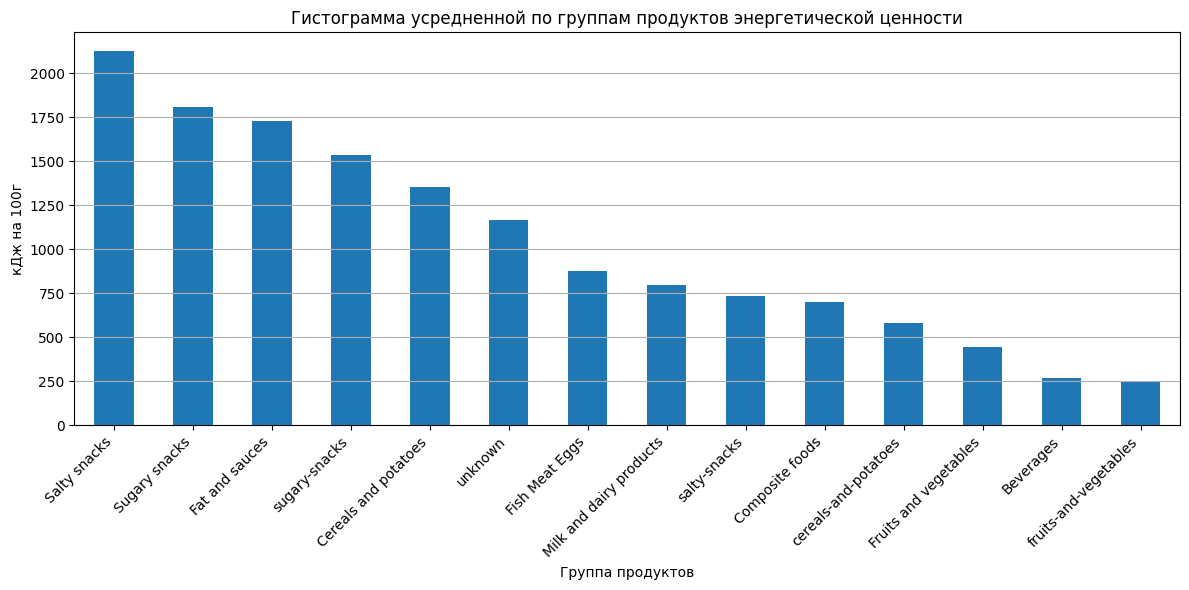

In [56]:
import matplotlib.pyplot as plt
df_ene = df[df['energy_100g'].notna() & df['pnns_groups_1'].str.lower().notna()].copy()
group_energy = df_ene.groupby('pnns_groups_1')['energy_100g'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
group_energy.plot(kind='bar')
plt.ylabel('кДж на 100г')
plt.xlabel('Группа продуктов')
plt.title('Гистограмма усредненной по группам продуктов энергетической ценности')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()